Nous allons explorer un peu le résultat de notre regression, et en profiter pour entrer un peu plus dans le monde des statistiques.

Nous allons rappeler quelques concepts fondamentaux, et les utiliser pour analyser les coefficients que nous calculons avec la descente par gradient

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Echantillonnage

Rappelons tout d'abord que le fait que nous utilisions des données synthétiques pour nos analyses nous donnent un avantage que nous n'avons pas dans la vraie vie, i.e. connaître les vraies valeurs des coefficients.

Les données auxquelles on a accès sont généralement un échantillon d'une population plus large, et nous faisons l'hypothèse qu'ils peuvent être expliqué par un modèle linéaire.

Le but de l'inférence statistique est de nous permettre de quantifier au mieux notre connaissance sur les paramètres sous-jacents, à partir des données observées.

Plusieurs échantillons peuvent être extraits d'une même population. Les statistiques calculées sur les différents échantillons peuvent varier, mais on s'attend en moyenne à ce qu'elles convergent vers les valeurs vraies.

In [11]:
def sample_index(x, size):
    """sample random elements and return array index with length defined by size
    
        Args:
            x (numpy.array) : vector to sample from
        Returns:
            numpy.array with length defined by size
    """
    index = np.arange(x.size)
    np.random.shuffle(index)
    return index[:size]

Dans le code suivant, nous allons simplement générer une liste d'entier, et calculer la moyenne sur quelques échantillons

In [15]:
x = np.arange(100)
print "true mean", x.mean()
for i in range(10):
    print x[sample_index(x, 10)].mean()

true mean 49.5
51.8
55.9
40.2
57.6
63.7
58.8
47.7
56.9
63.0
50.6


Intéressons-nous maintenant à la variation par rapport à cette valeur centrale.

### Théorème central limite :
Soit X une grandeur avec une moyenne $\mu$ et une variance finie $\sigma^2$, alors lorsque la taille de l'échantillon N tend vers $+\infty$, La distribution de X tend vers une  distribution gaussienne centrée autour de la valeur réelle, et dont l'erreur évolue en $1/\sqrt N$.

In [ ]:
#Exemple distribution binomiale
coin = [1, 0]

N = 10000.
binomial = np.random.choice(coin, N)
print "La probablité d'avoir un pile ou un face : ", binomial.mean()
# Le fait d'avoir mis 0 et 1 simplifie le calcul de la probabilité.
# Sinon il aurait fallu compter le nombre de pile et diviser par le total.

samples = []
for i in range(1000):
    samples.append(binomial[sample_index(binomial, 100)].mean())

plt.hist(samples, bins=50, normed=True)
plt.show()

On utilise généralement la variable Z pour résumer cette propriété

$$Z = \frac{\bar X-\mu}{\sigma / \sqrt N} \rightarrow N(0,1)$$

## Intervalles de confiances

On peut alors en déduire un encadrement des valeurs qui nous intéressent, avec une certaine "confiance". Par exemple, on sait que dans 95% des cas, la valeur tombera dans l'intervalle suivant :

$$\mu - 1.96 \sigma/\sqrt n < \bar X < \mu + 1.96 \sigma/\sqrt n$$

Par conséquent, on a également (simple réecriture de l'équation précédente):

$$\bar X - 1.96 \sigma/\sqrt n < \mu < \bar X + 1.96 \sigma /\sqrt n$$

et qu'on appelle l'intervalle de confiance, avec un niveau de confiance de 95%. 
**Cette intervalle contient la vraie valeur dans 95% des cas.**

Vous pouvez voir ici une illustration : http://rpsychologist.com/d3/CI/

## Distribution de Student

Sauf que $\sigma$ n'est généralement pas connu à priori !

Un estimateur non-biaisé de $\sigma^2$ est $s^2 = \frac{1}{N-1}\sum_i (x_i - \bar X)^2$, i.e. en moyenne, $s^2$ tend vers $\sigma^2$ dans la limite des grands nombres.

$\frac{s}{\sqrt N}$ est communément appelée **erreur standard.**
 
Dans ce cas, les encadrements précédents ne sont plus vrais. Cette nouvelle inconnue introduit de l'incertitude supplémentaire, qui va élargir les intervalles. Nous avons donc une nouvelle distibution, dite de Student ou t.

$$ t = \frac{\bar X-\mu}{s / \sqrt N}$$

L'intervalle est modifié de la façon suivante
$$\bar X - t^* \frac{s}{\sqrt N} < \mu < \bar X + t^* \frac{s}{\sqrt N}$$

Bien évidemment, le théorème central limite est toujours valide, et lorsque N est grand, la distribution tend vers une loi normale.

Le nombre $t^*$ doit être calculé et varie en fonction de la taille de l'échantillon. On parle de degrés de liberté. 

Degrés de liberté = Nombre de points - nombre de relations entre les points

Ici on compte la moyenne comme une relation entre les points, et par conséquent, on considère qu'il y **N-1** degrés de liberté.

### Fonctions statistiques avec scipy

Jusqu'à présent nous avons utilisé le module random de numpy pour générer des points aléatoires qui suivent une distribution normale.

Nous allons maintenant utiliser le paquet statistique de scipy pour pouvoir aller plus loin avec les distributions.

Le sous-module stats de scipy donne accès à différentes distributions statistiques discrètes et continues.

Nous allons comparer la distribution de probabilité gaussienne et la distribution t.

On utilise la méthode pdf : probability density function, ou densité de probabilité pour générer les points.

#### pdf: probability density function

Pour une variable aléatoire $X$ obéissant à une distribution statistique continue, il n'est pas possible de calculer la probabilité que $X$ vaille une valeur précise $x$ (saurez-vous dire pourquoi ?). On calcule la probabilité que $X$ soit dans un intervalle continue. 

La densité de probabilité est la fonction $f(x)$ telle que $P(a<x<b) = \int_a^b f(x) ~dx$

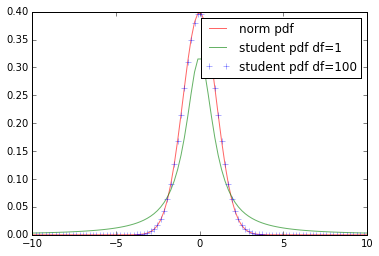

In [4]:
from scipy.stats import norm, t
import matplotlib.pyplot as plt

x = np.linspace(-10,10, 100)
plt.plot(x, norm.pdf(x), 'r-', lw=1, alpha=0.6, label='norm pdf')
plt.plot(x, t.pdf(x,df=1), 'g-', lw=1, alpha=0.6, label='student pdf df=1')
plt.plot(x, t.pdf(x,df=100), 'b+', lw=1, alpha=0.6, label='student pdf df=100')
plt.legend()
plt.show()

On constate que la distribution t est confondue avec la gaussienne pour 100 degrés de liberté.

Une deuxième méthode utile est la cdf, ou cumulated density function.

#### cdf: cumulative density function, ou fonction de répartition 

La cdf est la fonction telle que $F(x)=\int_{-\infty}^x f(t) ~dt $, $F : \mathbb{R} \rightarrow [0,1]$  
Elle donne la probabilité que la variable aléatoire soit inférieure ou égale à $x$.

Elle nous sera utile lorsque nous aurons introduit les tests d'hypothèse.

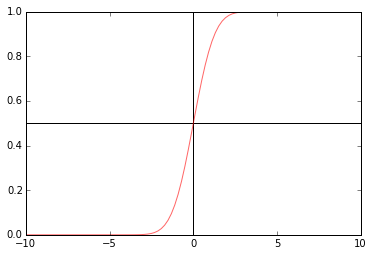

In [6]:
plt.plot(x, norm.cdf(x), 'r-', lw=1, alpha=0.6, label='norm cdf')
plt.hlines(0.5, x.min(), x.max())
plt.vlines(0, 0, 1)
plt.show()

On peut lire sur le graphe la valeur de x correspondant à 50% des valeurs réalisées (la médiane), et qui vaut 0 pour notre gaussienne, puisque `scipy.stats.norm` génére par défaut des points suivant $N(0,1)$. 

#### ppf: percent point function, ou fonction quantile
La fonction inverse, la percent point function nous donne directement la valeur précédente.

Elle est définir de façon formelle par $Q(p) = \inf\left\{ x \in \mathbb{R} : p \le F(x)\right\}$, avec $Q : [0,1] \rightarrow \mathbb{R}$.

Pour nos besoins, nous pouvons simplement retenir qu'elle retourne la valeur $x$ tel que $F(x) = p$


In [ ]:
p = np.linspace(0,1)
plt.plot(p, norm.ppf(p), 'r-', lw=1, alpha=0.6, label='norm ppf')
plt.vlines(0.5, -3, 3)
plt.show()

Par exemple, nous pouvons retrouver la valeur z correspondant à un intervalle pour 95%. On cherche donc les points (1-0.95)/2 et 1-(1-0.95)/2.

In [ ]:
print norm.ppf(0.025)
print norm.ppf(1-0.025)

On retrouve bien les valeurs de -1.96 et 1.96

Nous pouvons faire la même chose avec la distribution t. Mais en n'oubliant pas de préciser les degrés de liberté.

In [7]:
for df in [1,5,10,100,1000]:
    print t.ppf(0.025, df=df), t.ppf(1-0.025, df=df)

-12.7062047364 12.7062047364
-2.57058183661 2.57058183661
-2.22813885196 2.22813885196
-1.98397151845 1.98397151845
-1.96233908083 1.96233908083


On constate ici également que les valeurs tendent pour de grands degrés de liberté, vers la valeur de la gaussienne. Pour de faibles degrés de liberté, nous avons une incertitude plus forte, donc un écart-type plus important sur la valeur à encadrer.

## Analyse de la régression

Le paragraphe suivante illustre l'incertitude sur la valeur des paramètres calculés par la régression linéaire.

Les x,y initiaux représentent noter population totale. Nous allons échantillonner aléatoirement plusieurs fois et calculer les paramètres à chaque fois, en utilisant le module que nous avons créé pour la régression linéaire.

In [8]:
import sys
sys.path.append('POO/') #Nous pouvons spécifier à python où aller chercher nos modules

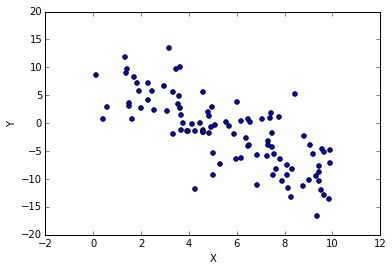

In [16]:
from regression.linear_regression import Linear
from simu_data import generate_data

x,y = generate_data(100, params=(10, -2), var = 5)
l = Linear(x,y)
l.plot_data()

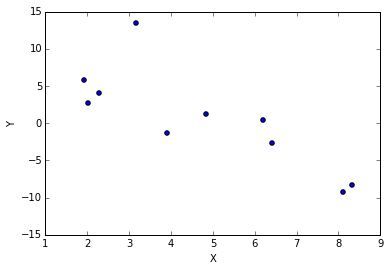

In [23]:
index = sample_index(x,10)
l.x_local, l.y_local = x[index], y[index]
l.plot_data()

In [24]:
l = Linear(x,y)
params_gd = l.fit(optimisation="descente_gradient")
print params_gd

[8.5248470715734612, -1.8122172261030693]


In [25]:
idx = sample_index(x,10)
l = Linear(x[idx],y[idx])
params_gd = l.fit(optimisation="descente_gradient")
params_gd

[6.6418037189828958, -1.4558700310918962]

In [26]:
sampled_params = []

for i in range(100):
    idx = sample_index(x,10)
    l = Linear(x[idx],y[idx])
    sampled_params.append(l.fit(optimisation="descente_gradient"))

Dans les plots suivants, nous allons voir la distribution des valeurs prises par les paramètres, et constater qu'ils ont tendance à être centrés autour des valeurs vrais, mais une certaine fluctuation, qui correspond à notre incertitude. Les 2 distributions tendent vers une distribution gaussienne.

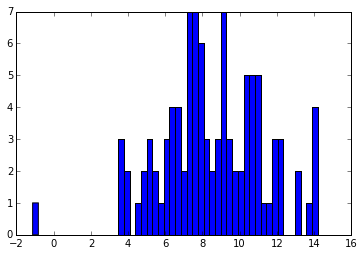

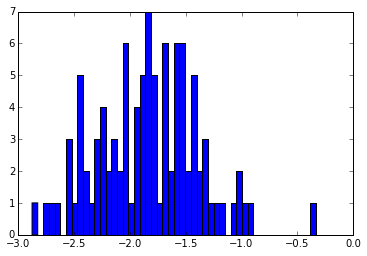

In [27]:
sampled_params = np.array(sampled_params)
plt.hist(sampled_params[:,0], bins=50)
plt.figure()
plt.hist(sampled_params[:,1], bins=50)
plt.show()

## Principe des tests statistiques

Nous formulons une hypothèse initiale $H_0$ que nous considérons comme vraie

$H_0$ : Pas de relations entre X et Y et $\theta_1 = 0$

$H a$ : Il y a une relation une X et Y

Nous vérifions la probabilité d'occurence de la valeur de notre paramètres $\theta_1$, qui encode la relation de dépendance linéaire, étant donné l'hypothèse nulle.

Cette valeur est la p-value. Si elle est supérieure à une valeur critique, alors on ne peut pas rejeter l'hypothèse nulle. Cette valeur critique dépend du domaine.

Il est courant de prendre p = 0.05.

A combien sommes-nous de l'hypothèse nulle ?
$$t = \frac{\hat \theta_1 - 0}{s/\sqrt N}$$

Sommes-nous suffisamment loin pour rejeter l'hypothèse nulle ?
$$P(t_{\alpha/2}<\frac{\hat \theta_1}{s/\sqrt N}<t_{1-\alpha/2})$$